定义感知机辅助函数，其中包括感知机符号函数sign

In [34]:
import numpy as np

# 定义sign符号函数
def sign(x, w, b):
    return np.dot(x, w) + b

def initialize_parameters(dim):
    w = np.zeros(dim)
    b = 0.0
    return w, b 

定义感知机训练过程

In [35]:
def perception_train(X_train, y_train, learning_rate):
    w, b = initialize_parameters(X_train.shape[1]) # 参数初始化
    is_wrong = False # 初始化误分类状态
    # 当存在误分类点时
    while not is_wrong:
        wrong_count = 0 # 初始化误分类点计数
        for i in range(len(X_train)):
            X = X_train[i]
            y = y_train[i]
            # 如果存在误分类点
            if y * sign(X, w, b) <= 0:
                # 更新参数
                w = w + learning_rate * np.dot(y, X)
                b = b + learning_rate * y
                wrong_count += 1 # 误分类点+1
        # 直到没有误分类点
        if wrong_count == 0:
            is_wrong = True
            print('there is no missclassification!')
        # 保存参数
        params = {
            'w': w,
            'b': b
        }
    return params

测试数据准备

In [36]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
data = np.array(df.iloc[:100, [0, 1, -1]]) # 取前100行数据，并使用其中两个特征
X, y = data[:, :-1], data[:, -1]
y = np.array([1 if i == 1 else -1 for i in y])
X, y, X.shape, y.shape

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1],
        [5.4, 3.7],
        [4.8, 3.4],
        [4.8, 3. ],
        [4.3, 3. ],
        [5.8, 4. ],
        [5.7, 4.4],
        [5.4, 3.9],
        [5.1, 3.5],
        [5.7, 3.8],
        [5.1, 3.8],
        [5.4, 3.4],
        [5.1, 3.7],
        [4.6, 3.6],
        [5.1, 3.3],
        [4.8, 3.4],
        [5. , 3. ],
        [5. , 3.4],
        [5.2, 3.5],
        [5.2, 3.4],
        [4.7, 3.2],
        [4.8, 3.1],
        [5.4, 3.4],
        [5.2, 4.1],
        [5.5, 4.2],
        [4.9, 3.1],
        [5. , 3.2],
        [5.5, 3.5],
        [4.9, 3.6],
        [4.4, 3. ],
        [5.1, 3.4],
        [5. , 3.5],
        [4.5, 2.3],
        [4.4, 3.2],
        [5. , 3.5],
        [5.1, 3.8],
        [4.8, 3. ],
        [5.1, 3.8],
        [4.6, 3.2],
        [5.3, 3.7],
        [5. , 3.3],


there is no missclassification!


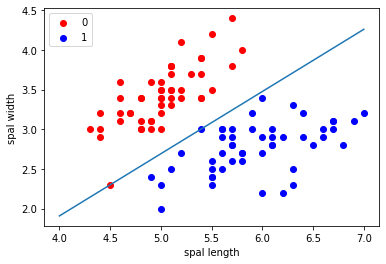

In [37]:
params = perception_train(X, y, 0.01)
import matplotlib.pyplot as plt
x_points = np.linspace(4, 7, 10) # np.linspace以均匀步长生成数字序列
y_hat = -(params['w'][0] * x_points + params['b']) / params['w'][1]
plt.plot(x_points, y_hat)
plt.scatter(data[:50, 0], data[:50, 1], color='red', label='0')
plt.scatter(data[50:100, 0], data[50:100, 1], color='blue', label='1')
plt.xlabel('spal length')
plt.ylabel('spal width')
plt.legend()
plt.show()

基于numpy实现神经网络

In [38]:
# 定义网络结构
def layer_sizes(X, Y):
    n_x = X.shape[0] # 输入层大小
    n_h = 4 # 隐藏层大小
    n_y = Y.shape[0] # 输出层大小
    return (n_x, n_h, n_y)

# 初始化参数
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01 # 权重系数随机初始化
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    # 封装成字典
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    return parameters

定义前向传播过程

In [39]:
# 定义前向传播过程
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    return A2, cache

定义损失函数

In [40]:
def compute_cost(A2, Y):
    m = Y.shape[1]  # 训练样本量
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1-Y) # 计算交叉熵损失
    cost = -1/m * np.sum(logprobs)
    cost = np.squeeze(cost) # 维度压缩
    return cost 

定义反向传播函数

In [41]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    # 执行反向传播
    dZ2 = A2- Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    grads = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }

    return grads

权重更新函数

In [42]:
def update_parameters(parameters, grads, learning_rate=1.2):
    parameters['W1'] -= grads['dW1'] * learning_rate
    parameters['b1'] -= grads['db1'] * learning_rate
    parameters['W2'] -= grads['dW2'] * learning_rate
    parameters['b2'] -= grads['db2'] * learning_rate
    return parameters

神经网络模型封装

In [43]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(3)
    # 输入和输出结点数
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate=1.2)
        if print_cost and i % 1000 == 0:
            print(f'iteration {i} cost {cost}')
    return parameters

生成模拟数据集

In [44]:
def create_dataset():
    np.random.seed(1)
    m = 400 # 数据量
    N = int(m/2) # 每个标签的实例数
    D = 2 # 数据维度
    X = np.zeros((m, D))
    Y = np.zeros((m, 1), dtype='uint8') # 标签维度
    a = 4
    for j in range(2):
        ix = range(N*j, N*(j+1))
        t = np.linspace(j*3.12, (j+1)*3.12, N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    X = X.T
    Y = Y.T
    return X, Y

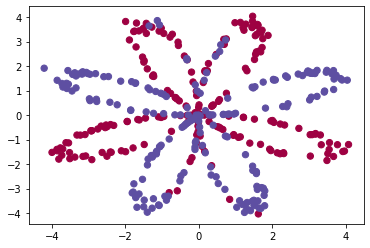

In [45]:
X, Y = create_dataset()
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

In [47]:
parameters = nn_model(X, Y, n_h=4, num_iterations=10000, print_cost=True)
parameters

iteration 0 cost 0.6931621661402946
iteration 1000 cost 0.25862506828690474
iteration 2000 cost 0.23933351654583146
iteration 3000 cost 0.23080163442975746
iteration 4000 cost 0.2255280270817635
iteration 5000 cost 0.22184467595022697
iteration 6000 cost 0.2190943835487874
iteration 7000 cost 0.22088369605864752
iteration 8000 cost 0.21948287975621533
iteration 9000 cost 0.21854783585583584


{'W1': array([[ 11.45753676,  -3.41713075],
        [  0.1580534 ,  -9.70576973],
        [ 11.49968112,  13.45174838],
        [  9.25498481, -10.19974607]]),
 'b1': array([[ 0.39374262],
        [-0.09959337],
        [ 0.03547642],
        [ 0.09107878]]),
 'W2': array([[ -3.45826866, -11.99167371,  -6.12698488,  10.56949614]]),
 'b2': array([[-0.05423241]])}

In [107]:
def predict(parameters, X): 
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

predictions = predict(parameters, X)
print(f'accuracy: {np.sum((predictions == Y)[0][(predictions == Y)[0] == True]) / len(predictions[0]) * 100} %')
print (f'Accuracy: {float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)*100)} %')

accuracy: 90.5 %
Accuracy: 90.5 %


基于sklearn实现MLP

In [109]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(4), random_state=1)
clf.fit(X.T, Y.T)
clf.predict(X.T[:5])

d:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0, 1, 1, 1, 0], dtype=uint8)